## 1.**Autoencoder**




Build and fit a convolutional autoencoder for the Fashion MNIST dataset. The components of this network will be many of the same pieces we’ve used with convolutional classification networks: Conv2D, MaxPooling, and so on. The encoder part of the network should run the input image through a few convolutional layers of your choice. The decoder part of the network will utilize UpSampling2D to get the representation back to the original image size.

In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
os.environ['KERAS_BACKEND']='tensorflow'

#load fashion data 
from keras.datasets import fashion_mnist


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

In [4]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/30





60000/60000 [==============================] - 15s 250us/step - loss: 0.3754 - val_loss: 0.3402
Epoch 2/30
60000/60000 [==============================] - 7s 110us/step - loss: 0.3299 - val_loss: 0.3230
Epoch 3/30
60000/60000 [==============================] - 7s 114us/step - loss: 0.3178 - val_loss: 0.3122
Epoch 4/30
60000/60000 [==============================] - 7s 119us/step - loss: 0.3104 - val_loss: 0.3147
Epoch 5/30
60000/60000 [==============================] - 7s 120us/step - loss: 0.3060 - val_loss: 0.3074
Epoch 6/30
60000/60000 [==============================] - 7s 120us/step - loss: 0.3026 - val_loss: 0.3052
Epoch 7/30
60000/60000 [==============================] - 7s 121us/step - loss: 0.3001 - val_loss: 0.3022
Epoch 8/30
60000/60000 [==============================] - 7s 120us/step - loss: 0.2979 - val_loss: 0.3033
Epoch 9/30
60000/60000 [==============================] - 7s 120us/step - loss: 0.2963 - val_

In [0]:
autoencoder.save('autoencoder.h5')
decoded_imgs = autoencoder.predict(x_test)


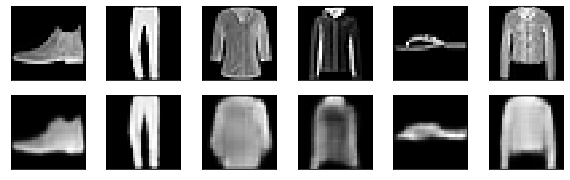

In [7]:
# display example images
n = 6
plt.figure(figsize=(10, 3))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i*2].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i*2].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **2.Image Classification**

### 2.1 Deep CNN

Build a deep CNN to classify the images. Provide a brief description of the architectural choices you’ve made: kernel sizes, strides, padding, network depth. Train your network end-to-end. Report on your model’s performance on training set and test set.

kernel sizes: 4 x 4

strides: 1 

padding: 0

network depth: 4

The network depth is 4, it includes 2 Conv layers and 2 dense layers. For the Conv layers, the kernel sizes are 4x4, strides are 1 and it uses zero padding to make sure ouputs have the same size.

In [0]:
# !pip install q tensorflow==2.0.0

In [0]:
# Tools for data transformation
from keras.utils import np_utils
from keras.models import Sequential
# from keras.utils.np_utils import to_categorical

batch_size = 128
num_classes = 10
epochs = 30

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


In [10]:
# Declaring sequential model
from keras.models import Sequential
from keras.layers import Dropout, Flatten

model = Sequential()
# CNN input layer: input_shape: (depth,width,height)
# CNN convolution: number of filters, height and width of kernel
model.add(Conv2D(filters = 32,kernel_size=(4, 4), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))
# Notice here the the first entry output is none
print(model.output_shape)

# Next we add the remaining layers with 2 by 2 Maxpooling layer and 0.15 Dropout rate
model.add(Conv2D(filters = 64,kernel_size=(4, 4), 
                 activation='relu', strides=(1, 1), 
                 padding='valid'))

model.add(Dropout(0.15))

# Setting up the fully connected layer with 128 Dense nodes, and 0.3 Dropout rate
model.add(Flatten())
model.add(Dense(batch_size, activation='relu'))
model.add(Dropout(0.3))

# Class layer
model.add(Dense(10, activation='softmax'))
print(model.summary())

(None, 25, 25, 32)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 64)        32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)           

In [11]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fitting the model
model.fit(x_train, y_train,
          epochs=30,
          batch_size=128,
          verbose = 1)

Epoch 1/30
60000/60000 [==============================] - 12s 201us/step - loss: 0.4585 - acc: 0.8365
Epoch 2/30
60000/60000 [==============================] - 11s 188us/step - loss: 0.2907 - acc: 0.8939
Epoch 3/30
60000/60000 [==============================] - 12s 193us/step - loss: 0.2399 - acc: 0.9111
Epoch 4/30
60000/60000 [==============================] - 11s 187us/step - loss: 0.2027 - acc: 0.9257
Epoch 5/30
60000/60000 [==============================] - 11s 187us/step - loss: 0.1732 - acc: 0.9363
Epoch 6/30
60000/60000 [==============================] - 11s 188us/step - loss: 0.1422 - acc: 0.9476
Epoch 7/30
60000/60000 [==============================] - 11s 188us/step - loss: 0.1169 - acc: 0.9561
Epoch 8/30
60000/60000 [==============================] - 11s 190us/step - loss: 0.0994 - acc: 0.9629
Epoch 9/30
60000/60000 [==============================] - 11s 188us/step - loss: 0.0830 - acc: 0.9694
Epoch 10/30
60000/60000 [==============================] - 11s 185us/step - loss: 

NameError: ignored

In [14]:
#  Evaluating the model
score_train = model.evaluate(x_train, y_train, verbose=1)
print('The Training Dataset accuracy:', score_train[1])
score_test = model.evaluate(x_test, y_test, verbose=1)
print('The Testing Dataset accuracy:', score_test[1])

60000/60000 [==============================] - 7s 123us/step
The Training Dataset accuracy: 0.9989833333333333
10000/10000 [==============================] - 1s 121us/step
The Testing Dataset accuracy: 0.9208


### **2.2 Transfer Learning**


Repeat the same task, but this time utilize a pre-trained network for the major- ity of your model. You should only train the final Dense layer, all other weights should be fixed. You can use whichever pre-trained backbone you like (ResNet, VGG, etc). Report on your model’s performance on training set and test set.


Pre-trained using VGG19

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.applications import VGG16, VGG19
from keras.preprocessing import image
import cv2
import numpy as np




In [22]:
batch_size = 128
num_classes = 10
epochs = 30

conv_base = VGG19(weights="imagenet",include_top=False,input_shape=(48,48,3))

80142336/80134624 [==============================] - 7s 0us/step


In [28]:
model_new = Sequential()
model_new.add(conv_base)
model_new.add(Flatten())
model_new.add(Dense(256, activation="relu"))
model_new.add(Dropout(0.15))
model_new.add(Dense(64, activation="relu"))
model_new.add(Dropout(0.3))
model_new.add(Dense(10, activation='softmax'))
conv_base.trainable = False
model_new.trainable_weights

[<tf.Variable 'dense_12/kernel:0' shape=(512, 256) dtype=float32_ref>,
 <tf.Variable 'dense_12/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_13/kernel:0' shape=(256, 64) dtype=float32_ref>,
 <tf.Variable 'dense_13/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'dense_14/kernel:0' shape=(64, 10) dtype=float32_ref>,
 <tf.Variable 'dense_14/bias:0' shape=(10,) dtype=float32_ref>]

In [29]:
model_new.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["acc"])
model_new.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

Re-set the images in the new model

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

x_train = np.dstack([x_train] * 3)
x_test = np.dstack([x_test] * 3)

x_train = x_train.reshape(-1, 28, 28, 3)
x_test = x_test.reshape (-1, 28, 28, 3)
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])/255.
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])/255.


In [43]:
x_train.shape, x_test.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [35]:
# Re-train the model
model_new.fit(x_train, Y_train,
          epochs=15,
          batch_size=128,
          verbose = 1)

Epoch 1/30
60000/60000 [==============================] - 44s 732us/step - loss: 0.7123 - acc: 0.7504
Epoch 2/30
60000/60000 [==============================] - 43s 715us/step - loss: 0.5602 - acc: 0.8026
Epoch 3/30
60000/60000 [==============================] - 43s 715us/step - loss: 0.5132 - acc: 0.8184
Epoch 4/30
60000/60000 [==============================] - 43s 713us/step - loss: 0.4876 - acc: 0.8234
Epoch 5/30
60000/60000 [==============================] - 43s 713us/step - loss: 0.4683 - acc: 0.8297
Epoch 6/30
60000/60000 [==============================] - 43s 713us/step - loss: 0.4507 - acc: 0.8361
Epoch 7/30
60000/60000 [==============================] - 43s 713us/step - loss: 0.4395 - acc: 0.8409
Epoch 8/30
60000/60000 [==============================] - 43s 713us/step - loss: 0.4276 - acc: 0.8434
Epoch 9/30
60000/60000 [==============================] - 43s 714us/step - loss: 0.4185 - acc: 0.8469
Epoch 10/30
60000/60000 [==============================] - 43s 714us/step - loss: 

In [46]:
score_train_new = model_new.evaluate(x_train, Y_train, verbose=1)
print('The Training Dataset accuracy with VGG16 pre-trained:', score_train_new[1])
score_test_new = model_new.evaluate(x_test, Y_test, verbose=1)
print('The Testing Dataset accuracy with VGG16 pre-trained:', score_test_new[1])

60000/60000 [==============================] - 65s 1ms/step
The Training Dataset accuracy with VGG16 pre-trained: 0.8923
10000/10000 [==============================] - 11s 1ms/step
The Testing Dataset accuracy with VGG16 pre-trained: 0.8552


## **3 Text Classification**

**Background.** In this problem, we will build models that read short text segments (tweets) and identify if one or more specific topics are being discussed. 

**Dataset.** The dataset consists of tweets along with labels for which topics were being referenced in the tweet. Examples of the topics include ”storms”, ”rain”, ”hurricane”, ”snow” and so on. Unlike previous classification problems we have encountered, in this dataset, there is not just a single right answer. The labels here are derived from multiple annotators decided how to label each tweet, so a single tweet can be about more than one topic. The label is the
fraction of annotations for a given topic, and each row should sum to 1.

### **3.1 RNN**

Build and train a Recurrent Neural Network to solve this text classification task. You can use any type of RNN you wish (SimpleRNN, GRU, LSTM).

In [50]:
import pandas as pd
import numpy as np
import os
from google.colab import files
# load data into colab
uploaded = files.upload()
import io
text_data = pd.read_csv(io.BytesIO(uploaded['tweets_with_labels.csv']), sep='\t')


Saving tweets_with_labels.csv to tweets_with_labels (1).csv


In [56]:
text_data.shape

(77946, 17)

In [58]:
text_data.head(6)

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
1,2,RT: @mention: I love rainy days.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0
4,9,@mention good morning sunshine,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0
5,10,Rather be storm chasing.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,1.0,0.000,0.0,0.0


In [61]:
!pip install regex

     |████████████████████████████████| 645kB 2.7MB/s 


In [85]:
import nltk
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt
from IPython.display import SVG, display
from sklearn.metrics import roc_curve, auc
import collections
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import preprocess_input
from keras.layers.embeddings import Embedding
from keras.layers import Input, Dense, Dropout, Activation, Flatten, GlobalMaxPooling1D, LSTM
from keras.callbacks import TensorBoard
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from sklearn.utils import class_weight
from keras.layers import LSTM, Conv1D, GlobalMaxPooling1D
import regex
from nltk.corpus import stopwords
import gensim
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
import re

stopWords = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_tweets(tweet):
    tweet = re.sub("@mention", "",tweet)
    tweet = re.sub("{link}", "",tweet)
    tweet = re.sub("[^A-Za-z]"," ",tweet)
    tweet = re.sub(r'\bRT\b', '', tweet)
    tweet = re.sub("\s+"," ",tweet)
    tokens = word_tokenize(tweet)
    words = [word for word in tokens if word not in stopWords]
    words = [stemmer.stem(w).strip("'") for w in words]
    words = [lemmatizer.lemmatize(w, pos="a") for w in words]
    words = [word for word in words if len(word)!=1]
    final_tweet = ' '.join(words)
    return final_tweet


In [0]:
# preprocess the data 
new_tweet = [preprocess_tweets(x) for x in list(text_data.tweet)]
text_data['new_tweets'] = new_tweet

In [0]:
token = [word_tokenize(x) for x in list(text_data.new_tweets)]

# remove empty tweets
remove_lst=[]
for w in token:
    remove_lst.append(len(w))
bad_idx = [n for n,x in enumerate(remove_lst) if x == 0]
tweets_updated = text_data.drop(bad_idx)


X = [word_tokenize(x) for x in list(tweets_updated['new_tweets'])]

# remove empty labeled y for any k1 to k15 
label = tweets_updated.loc[:,'k1':'k15']
label[tweets_updated != 0] = 1
y = label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
X_train[1:3]

[['No', 'wonder', 'call', 'blew', 'monster', 'windi'],
 ['fear',
  'storm',
  'drainag',
  'ditch',
  'adjac',
  'properti',
  'overflow',
  'river',
  'stream',
  'nearbi',
  'garag',
  'iffi',
  'think',
  'hous',
  'ok']]

In [78]:
X_test[1]

['weather', 'pm', 'feel', 'humid', 'mph', 'south', 'wind']

In [82]:
y_train[1:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.]])

In [83]:
y_test[1]

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.])

In [0]:
MAX_NUM_WORDS = 300 
MAX_SEQUENCE_LENGTH = 50 

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train) 
test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_2 = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH)
X_test_2 = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH)

## split train data into training and validation
train_text = X_train_2[:50000]

val_text = X_train_2[50000:]

train_label = y_train[:50000]

val_label = y_train[50000:]

In [98]:
# Build LSTM model 
model_RNN = Sequential()
model_RNN.add(Embedding(MAX_NUM_WORDS, 64))
#model.add(SimpleRNN(32))
#model.add(GRU(32))
model_RNN.add(LSTM(32))
model_RNN.add(Dense(15, activation ='softmax'))
model_RNN.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['acc'])
rnn_history = model_RNN.fit(train_text,train_label,epochs = 30,validation_data = (val_text, val_label), batch_size = 128,verbose=1)


Train on 50000 samples, validate on 4551 samples
Epoch 1/30
50000/50000 [==============================] - 41s 820us/step - loss: 3.5441 - acc: 0.5045 - val_loss: 2.9027 - val_acc: 0.6768
Epoch 2/30
50000/50000 [==============================] - 39s 785us/step - loss: 2.8851 - acc: 0.6601 - val_loss: 2.7686 - val_acc: 0.6836
Epoch 3/30
50000/50000 [==============================] - 38s 760us/step - loss: 2.8074 - acc: 0.6646 - val_loss: 2.7276 - val_acc: 0.6950
Epoch 4/30
50000/50000 [==============================] - 37s 741us/step - loss: 2.7693 - acc: 0.6702 - val_loss: 2.7238 - val_acc: 0.6763
Epoch 5/30
50000/50000 [==============================] - 37s 749us/step - loss: 2.7460 - acc: 0.6721 - val_loss: 2.6905 - val_acc: 0.6818
Epoch 6/30
50000/50000 [==============================] - 36s 729us/step - loss: 2.7312 - acc: 0.6755 - val_loss: 2.6861 - val_acc: 0.6812
Epoch 7/30
50000/50000 [==============================] - 38s 753us/step - loss: 2.7208 - acc: 0.6771 - val_loss: 2.6

In [99]:
RNN_loss, RNN_acc = model_RNN.evaluate(X_test_2, y_test)
# Test Error
print('The loss is:', RNN_loss)
print('The accuray is: %.3f%%' % (RNN_acc*100))

23379/23379 [==============================] - 14s 601us/step
The loss is: 2.7170975461804256
The accuray is: 65.905%


### **3.2 CNN**


Build and train a 1D CNN for this text classification task. We recommend you do a character-level convolution (with character embeddings). You might gain some insight and inspiration from these text classification approaches:

http://www.aclweb.org/anthology/D14-1181

https://arxiv.org/abs/1702.08568

In [97]:
model_CNN = Sequential()
model_CNN.add(Embedding(MAX_NUM_WORDS,64))
model_CNN.add(Conv1D(64, kernel_size = 3,padding='valid',activation='relu',strides=1))
model_CNN.add(GlobalMaxPooling1D())
model_CNN.add(Dropout(0.2))
model_CNN.add(Dense(64,activation='relu'))
model_CNN.add(Dense(15,activation='softmax'))
model_CNN.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics=['acc'])
cnn_history = model_CNN.fit(train_text,train_label,epochs = 30,validation_data = (val_text, val_label), batch_size = 128,verbose=1)

Train on 50000 samples, validate on 4551 samples
Epoch 1/30
50000/50000 [==============================] - 4s 89us/step - loss: 3.3441 - acc: 0.5731 - val_loss: 2.7516 - val_acc: 0.6814
Epoch 2/30
50000/50000 [==============================] - 3s 66us/step - loss: 2.8626 - acc: 0.6634 - val_loss: 2.6895 - val_acc: 0.6717
Epoch 3/30
50000/50000 [==============================] - 3s 64us/step - loss: 2.8128 - acc: 0.6649 - val_loss: 2.6749 - val_acc: 0.6737
Epoch 4/30
50000/50000 [==============================] - 3s 66us/step - loss: 2.7837 - acc: 0.6666 - val_loss: 2.6697 - val_acc: 0.6752
Epoch 5/30
50000/50000 [==============================] - 3s 65us/step - loss: 2.7621 - acc: 0.6689 - val_loss: 2.6599 - val_acc: 0.6790
Epoch 6/30
50000/50000 [==============================] - 3s 65us/step - loss: 2.7452 - acc: 0.6696 - val_loss: 2.6535 - val_acc: 0.6770
Epoch 7/30
50000/50000 [==============================] - 3s 65us/step - loss: 2.7284 - acc: 0.6730 - val_loss: 2.6569 - val_acc:

In [100]:
CNN_loss, CNN_acc = model_CNN.evaluate(X_test_2, y_test)
# Test Error
print('The loss is:', CNN_loss)
print('The accuray is: %.3f%%' % (CNN_acc*100))

23379/23379 [==============================] - 1s 61us/step
The loss is: 2.757197773177659
The accuray is: 67.026%


### **3.3**

Be sure to directly compare your two methods with an ROC curve or similar validation method. Don’t forget to create a train-test split.

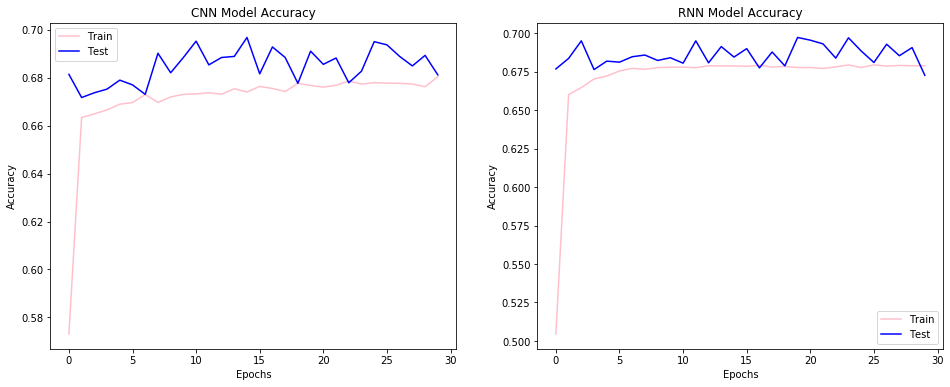

In [101]:

# Plot the results
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['acc'], color = 'pink')
plt.plot(cnn_history.history['val_acc'], color = 'blue')
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['acc'],color = 'pink')
plt.plot(rnn_history.history['val_acc'],color = 'blue')
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()